Download [this dataset from Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata) and use the K-Means Clustering algorithm to explore patterns in the dataset. Choose a few features (2~4) of the dataset to compare (for example, what do the clustering patterns of credit limit vs balance look like?, etc.) and feel free to try out different numbers of clusters. Try to discover what makes each cluster distinct from another (clusters of low balance vs high balance? Are there groups of certain credit limits?, etc.). Use visualization if needed to identify trends in this data.

In [11]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
file = 'datasets/CC General.csv'

In [4]:
credit_df = pd.read_csv(file)
credit_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [30]:
# Credit_limit, Balance, Cash Advance Frequency 

new_df = credit_df[["BALANCE", "CASH_ADVANCE_FREQUENCY", "CREDIT_LIMIT", "PAYMENTS"]]

In [31]:
new_df.head()

,BALANCE,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
0,40.900749,0.000000,1000.0,201.802084
1,3202.467416,0.250000,7000.0,4103.032597
2,2495.148862,0.000000,7500.0,622.066742
3,1666.670542,0.083333,7500.0,0.000000
4,817.714335,0.000000,1200.0,678.334763


In [32]:
new_df.isna().sum()

BALANCE                   0
CASH_ADVANCE_FREQUENCY    0
CREDIT_LIMIT              1
PAYMENTS                  0
dtype: int64

In [33]:
new_df = new_df.dropna(subset = ['CREDIT_LIMIT'])
new_df.isna().sum()

BALANCE                   0
CASH_ADVANCE_FREQUENCY    0
CREDIT_LIMIT              0
PAYMENTS                  0
dtype: int64

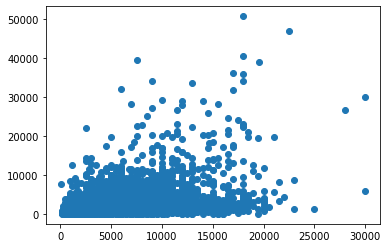

In [36]:
plt.scatter(new_df['CREDIT_LIMIT'],new_df['PAYMENTS'])

In [37]:
#initialize k-means function
#set number of clusters to categorize = 4
kmeans = KMeans(n_clusters=4)

#the model will learn which data points seem similar
#calculates centroids
#classfies data points in clusters based on distance to centroids
kmeans.fit(new_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
print(kmeans.cluster_centers_)

[[7.81142395e+02 1.08951274e-01 2.11715917e+03 8.88879904e+02]
 [5.02226711e+03 2.36255478e-01 1.18383810e+04 3.57749380e+03]
 [1.83153987e+03 1.47194792e-01 6.42366955e+03 2.07517877e+03]
 [4.88894899e+03 2.94160289e-01 1.29814433e+04 2.12734728e+04]]


In [39]:
new_df['Clusters'] = kmeans.labels_
new_df.head()

,BALANCE,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,Clusters
0,40.900749,0.000000,1000.0,201.802084,0
1,3202.467416,0.250000,7000.0,4103.032597,2
2,2495.148862,0.000000,7500.0,622.066742,2
3,1666.670542,0.083333,7500.0,0.000000,2
4,817.714335,0.000000,1200.0,678.334763,0


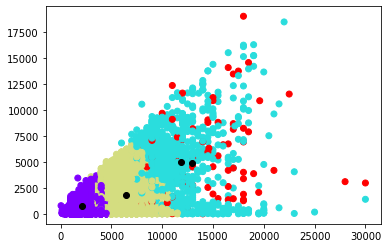

In [44]:
plt.scatter(new_df['CREDIT_LIMIT'], new_df['BALANCE'], c=new_df['Clusters'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,0], c='black')

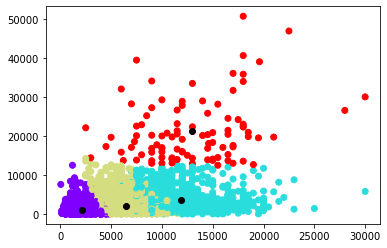

In [43]:
plt.scatter(new_df['CREDIT_LIMIT'],new_df['PAYMENTS'], c=new_df['Clusters'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], c='black')

In [46]:
# 3 features
diff_df = credit_df[["BALANCE","CREDIT_LIMIT", "PAYMENTS"]]

In [47]:
diff_df.head()

,BALANCE,CREDIT_LIMIT,PAYMENTS
0,40.900749,1000.0,201.802084
1,3202.467416,7000.0,4103.032597
2,2495.148862,7500.0,622.066742
3,1666.670542,7500.0,0.000000
4,817.714335,1200.0,678.334763


In [49]:
diff_df = diff_df.dropna(subset = ['CREDIT_LIMIT'])
diff_df.isna().sum()

BALANCE         0
CREDIT_LIMIT    0
PAYMENTS        0
dtype: int64

In [54]:
kmeans2 = KMeans(n_clusters=3)

kmeans2.fit(diff_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
print(kmeans2.cluster_centers_)

[[3.11162132e+03 8.81449636e+03 2.43288492e+03 1.66382460e+00]
 [8.62767341e+02 2.58354280e+03 1.02719814e+03 3.20787677e-01]
 [4.78974625e+03 1.18632516e+04 1.61437366e+04 2.13756614e+00]]


In [56]:
diff_df['Clusters'] = kmeans2.labels_
diff_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,BALANCE,CREDIT_LIMIT,PAYMENTS,Clusters
0,40.900749,1000.0,201.802084,1
1,3202.467416,7000.0,4103.032597,0
2,2495.148862,7500.0,622.066742,0
3,1666.670542,7500.0,0.000000,0
4,817.714335,1200.0,678.334763,1


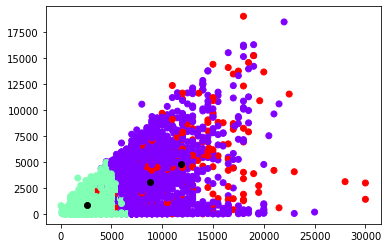

In [57]:
plt.scatter(diff_df['CREDIT_LIMIT'], diff_df['BALANCE'], c=diff_df['Clusters'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans2.cluster_centers_[:,1], kmeans2.cluster_centers_[:,0], c='black')

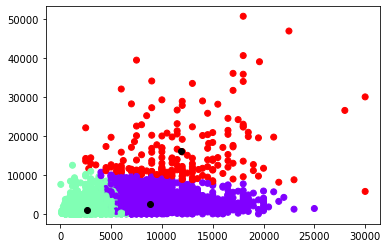

In [58]:
plt.scatter(diff_df['CREDIT_LIMIT'], diff_df['PAYMENTS'], c=diff_df['Clusters'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans2.cluster_centers_[:,1], kmeans2.cluster_centers_[:,2], c='black')

Looks like there are 2 or 3 groups of credit card limits. These clusters appear even when charted by other features like payments or balance. It looks like frequency of ATM withdrawals was pretty evenly distribued across all clusters, so i dropped that feature. 